# Test harness for applied vibration class

### Import the libraries

In [1]:
import numpy as np
import math

### Import the signal processing library

In [2]:
from cl_sig_features import cl_sig_features

#### Verify help and class structure

In [3]:
help(cl_sig_features)

Help on class cl_sig_features in module cl_sig_features:

class cl_sig_features(builtins.object)
 |  cl_sig_features(np_d_ch1, timebase_scale)
 |  
 |  Class to manage signal features on scope data and other signals
 |  
 |  Example usage:
 |      cl_test = cl_sig_features(np.array([1.,2., 3.]),1.1) 
 |      
 |  Should produce:
 |  
 |      print('np_d_ch1: '+ np.array2string(cl_test.np_d_ch1))
 |      print('timebase_scale: ' + '%0.3f' % cl_test.timebase_scale)
 |      print('i_ns: ' + '%3.f' % cl_test.i_ns)
 |      print('d_t_del: ' + '%0.3f' % cl_test.d_t_del)
 |      print('d_time' + np.array2string(cl_test.d_time))
 |      
 |      np_d_ch1: [1. 2. 3.]
 |      timebase_scale: 1.000
 |      i_ns:   3
 |      d_t_del: 4.000
 |      d_time[0. 4. 8.]
 |  
 |  Methods defined here:
 |  
 |  __init__(self, np_d_ch1, timebase_scale)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  b_save_data(self, str_data_prefix='testclass', idx_data=1)
 |      Save the 

### Define plot mode. 
Interactive mode is helpful for visuallizing the program execution

In [4]:
#%matplotlib widget

### Test for minimal construction

In [5]:
cl_sig_testmin = cl_sig_features(np.array([1.,2., 3.]),1.1)

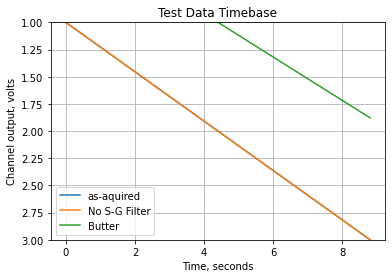

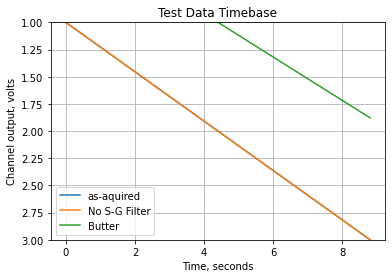

In [6]:
cl_sig_testmin.plt_sigs()

### Test - Even number of samples

In this test a simple sin wave is created and passed into the signal feature object for processing

In [7]:
d_fs = 2048
i_ns = (d_fs*2)
d_freq_sig = 20./(float(i_ns)/d_fs)
print('Signal frequency, hertz: ' + '%0.10f' % d_freq_sig)
d_timebase_scale = float(i_ns)/(d_fs*12.)
d_time_ext = np.linspace(0,(i_ns-1),i_ns)/float(i_ns)
np_d_test = np.sin(2 * math.pi * d_freq_sig * d_time_ext )
cl_sig_test01 = cl_sig_features(np_d_test, d_timebase_scale)

Signal frequency, hertz: 10.0000000000


#### Test plot

In [ ]:
lst_test01 = cl_sig_test01.plt_sigs()

In [ ]:
lst_spec = cl_sig_test01.plt_spec()

Extract the maximum value (assumed to be our component at 10 hertz) and check that the amplitude is very close to 1.

In [ ]:
d_test_point = np.max(np.abs(lst_spec[2]))
print('Maximum spectral value: ' + '%0.10f' % d_test_point)
assert abs(d_test_point - 1.) < 1e-12, 'Failed to find even component amplitude'

In [ ]:
2 & 0x1

### Test - Odd number of samples

In this test a simple sin wave with an odd number of samples is created and passed into the signal feature object for processing. This is primarily to test the rfft scaling.

In [ ]:
d_fs = 2047
i_ns = (d_fs*3)
d_freq_sig = 30./(float(i_ns)/d_fs)
print('Signal frequency, hertz: ' + '%0.6f' % d_freq_sig)
d_timebase_scale = float(i_ns)/(d_fs*12.)
d_time_ext = np.linspace(0,(i_ns-1),i_ns)/float(i_ns)
np_d_test = np.sin(2 * math.pi * d_freq_sig * d_time_ext )
cl_sig_test_odd = cl_sig_features(np_d_test, d_timebase_scale)

#### Test plot

In [ ]:
lst_plot_odd = cl_sig_test_odd.plt_sigs()

In [ ]:
lst_spec = cl_sig_test_odd.plt_spec()

In [ ]:
d_test_point = np.max(np.abs(lst_spec[2]))
print('Maximum spectral value: ' + '%0.6f' % d_test_point)
assert abs(d_test_point - 1.) < 1e-3, 'Failed to find odd component amplitude'

### Test for engineering units

In [ ]:
cl_sig_test01.str_eu = "g's"

In [ ]:
lst_sigs = cl_sig_test01.plt_sigs()

In [ ]:
lst_sigs.set_size_inches(4*1.6, 4)
lst_sigs.savefig('Test_Timebase.pdf')

In [ ]:
lst_spec = cl_sig_test01.plt_spec()

### Test plot annotations

In [ ]:
cl_sig_test01.str_plot_desc = 'My Great Plot'
lst_sigs_title = cl_sig_test01.plt_sigs()

In [ ]:
lst_spec_title = cl_sig_test01.plt_spec()

In [ ]:
cl_sig_test01.ylim_tb = [-2., 2.]
lst_sigs_ylim_tb = cl_sig_test01.plt_sigs()

In [ ]:
cl_sig_test01.b_spec_peak = True
lst_spec_peak_tb = cl_sig_test01.plt_spec()